Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default = "colab"

Importing Dataset and Exploring it

In [3]:
pip install yfinance

In [35]:
import pandas as pd
df=pd.read_csv("/content/TSLA.csv")

# Display the DataFrame
print(df.head())


   Unnamed: 0        Date      Open      High       Low     Close     Volume
0           0  2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500
1           1  2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500
2           2  2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000
3           3  2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000
4           4  2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3534 non-null   int64  
 1   Date        3534 non-null   object 
 2   Open        3534 non-null   float64
 3   High        3534 non-null   float64
 4   Low         3534 non-null   float64
 5   Close       3534 non-null   float64
 6   Volume      3534 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 193.4+ KB


In [37]:
df.describe()

Unnamed: 0         Open         High          Low        Close  \
count  3534.000000  3534.000000  3534.000000  3534.000000  3534.000000   
mean   1766.500000    74.997811    76.642865    73.249666    74.985912   
std    1020.322253   102.281381   104.556354    99.811577   102.217353   
min       0.000000     1.076000     1.108667     0.998667     1.053333   
25%     883.250000    11.448667    11.753834    11.191166    11.532334   
50%    1766.500000    17.417334    17.645333    17.064000    17.400333   
75%    2649.750000   159.177502   161.312500   153.632500   158.180004   
max    3533.000000   411.470001   414.496674   405.666656   409.970001   

             Volume  
count  3.534000e+03  
mean   9.694511e+07  
std    7.877581e+07  
min    1.777500e+06  
25%    4.749600e+07  
50%    8.216325e+07  
75%    1.228650e+08  
max    9.140820e+08

Data Visualization using plotly express

In [38]:
px.area(df, x="Date", y="Close")

In [39]:
px.line(df, x="Date", y="Close")

In [40]:
px.area(df,x="Date", y="Volume")

In [41]:
px.bar(df, y="Volume")

In [42]:
px.box(df, y="Close")

In [43]:
columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=columns)
ndf.head()

Date     Close
0  2010-06-29  1.592667
1  2010-06-30  1.588667
2  2010-07-01  1.464000
3  2010-07-02  1.280000
4  2010-07-06  1.074000

In [44]:
df=ndf.rename(columns={"Date":"ds","Close":"y"})
df.head()

ds         y
0  2010-06-29  1.592667
1  2010-06-30  1.588667
2  2010-07-01  1.464000
3  2010-07-02  1.280000
4  2010-07-06  1.074000

Creating Prophet model

In [45]:
m=Prophet()

In [46]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxn2vvj8/mzhk_2qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxn2vvj8/p2z4ackm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20603', 'data', 'file=/tmp/tmpgxn2vvj8/mzhk_2qz.json', 'init=/tmp/tmpgxn2vvj8/p2z4ackm.json', 'output', 'file=/tmp/tmpgxn2vvj8/prophet_modelfuzapqcp/prophet_model-20241228150622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting(Predicting the future)

In [51]:
future=m.make_future_dataframe(periods=30) #1 month prediction

In [52]:
forecast=m.predict(future)

In [53]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-06-29   -1.365565  -32.689754   27.712791    -1.365565    -1.365565   
1    2010-06-30   -1.357023  -32.871072   26.867668    -1.357023    -1.357023   
2    2010-07-01   -1.348481  -31.249878   28.527547    -1.348481    -1.348481   
3    2010-07-02   -1.339940  -33.335599   27.827954    -1.339940    -1.339940   
4    2010-07-06   -1.305773  -32.549180   30.166032    -1.305773    -1.305773   
5    2010-07-07   -1.297231  -32.462440   33.620186    -1.297231    -1.297231   
6    2010-07-08   -1.288689  -32.896418   32.795630    -1.288689    -1.288689   
7    2010-07-09   -1.280147  -30.474114   31.500095    -1.280147    -1.280147   
8    2010-07-12   -1.254522  -31.180987   33.054351    -1.254522    -1.254522   
9    2010-07-13   -1.245980  -27.821729   33.739817    -1.245980    -1.245980   
10   2010-07-14   -1.237439  -28.074032   34.097161    -1.237439    -1.237439   
11   2010-07-15   -1.228897  -32.306912   30.747516    -1.228897    -1.228897   
12   2010-07-16   -1.220355  -31.438262   29.616164    -1.220355    -1.220355   
13   2010-07-19   -1.194730  -30.934621   35.475022    -1.194730    -1.194730   
14   2010-07-20   -1.186188  -31.000931   31.242858    -1.186188    -1.186188   
15   2010-07-21   -1.177646  -31.063776   31.649938    -1.177646    -1.177646   
16   2010-07-22   -1.169104  -30.555027   33.169697    -1.169104    -1.169104   
17   2010-07-23   -1.160563  -33.734843   29.761385    -1.160563    -1.160563   
18   2010-07-26   -1.134937  -29.105859   31.934896    -1.134937    -1.134937   
19   2010-07-27   -1.126396  -31.523082   31.694828    -1.126396    -1.126396   
20   2010-07-28   -1.117854  -31.931944   31.199401    -1.117854    -1.117854   
21   2010-07-29   -1.109312  -32.773026   30.666489    -1.109312    -1.109312   
22   2010-07-30   -1.100770  -33.017944   30.307278    -1.100770    -1.100770   
23   2010-08-02   -1.075145  -34.773305   31.052518    -1.075145    -1.075145   
24   2010-08-03   -1.066603  -32.352157   28.887074    -1.066603    -1.066603   
25   2010-08-04   -1.058062  -32.794557   30.137578    -1.058062    -1.058062   
26   2010-08-05   -1.049520  -32.337383   31.065750    -1.049520    -1.049520   
27   2010-08-06   -1.040978  -33.795364   31.323906    -1.040978    -1.040978   
28   2010-08-09   -1.015353  -29.347860   34.527755    -1.015353    -1.015353   
29   2010-08-10   -1.006811  -29.357652   30.869734    -1.006811    -1.006811   
30   2010-08-11   -0.998269  -32.378875   30.399486    -0.998269    -0.998269   
31   2010-08-12   -0.989727  -32.274816   31.182447    -0.989727    -0.989727   
32   2010-08-13   -0.981186  -32.016847   31.978308    -0.981186    -0.981186   
33   2010-08-16   -0.955560  -30.580828   32.855387    -0.955560    -0.955560   
34   2010-08-17   -0.947019  -30.295398   33.812224    -0.947019    -0.947019   
35   2010-08-18   -0.938477  -30.559007   30.440449    -0.938477    -0.938477   
36   2010-08-19   -0.929935  -28.975901   31.773594    -0.929935    -0.929935   
37   2010-08-20   -0.921393  -32.008735   32.028893    -0.921393    -0.921393   
38   2010-08-23   -0.895768  -29.333288   33.057855    -0.895768    -0.895768   
39   2010-08-24   -0.887226  -32.485699   32.885440    -0.887226    -0.887226   
40   2010-08-25   -0.878685  -31.149161   33.314501    -0.878685    -0.878685   
41   2010-08-26   -0.870143  -30.696202   30.535327    -0.870143    -0.870143   
42   2010-08-27   -0.861601  -30.739304   31.067797    -0.861601    -0.861601   
43   2010-08-30   -0.835976  -29.872928   31.988989    -0.835976    -0.835976   
44   2010-08-31   -0.827434  -31.111875   31.016036    -0.827434    -0.827434   
45   2010-09-01   -0.818892  -29.207167   30.242011    -0.818892    -0.818892   
46   2010-09-02   -0.810351  -30.199564   32.696925    -0.810351    -0.810351   
47   2010-09-03   -0.801809  -31.070258   31.790072    -0.801809    -0.801809   
48   2010-09-07   -0.767642  -28.558143   34

In [54]:
px.line(forecast,x="ds",y="yhat")

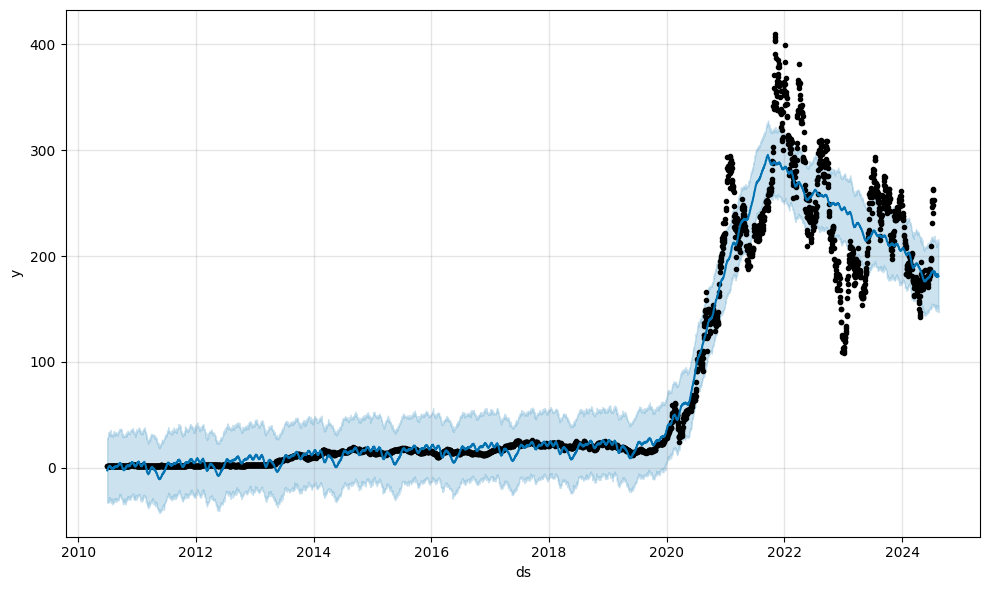

In [55]:
figure=m.plot(forecast,xlabel="ds",ylabel="y" )

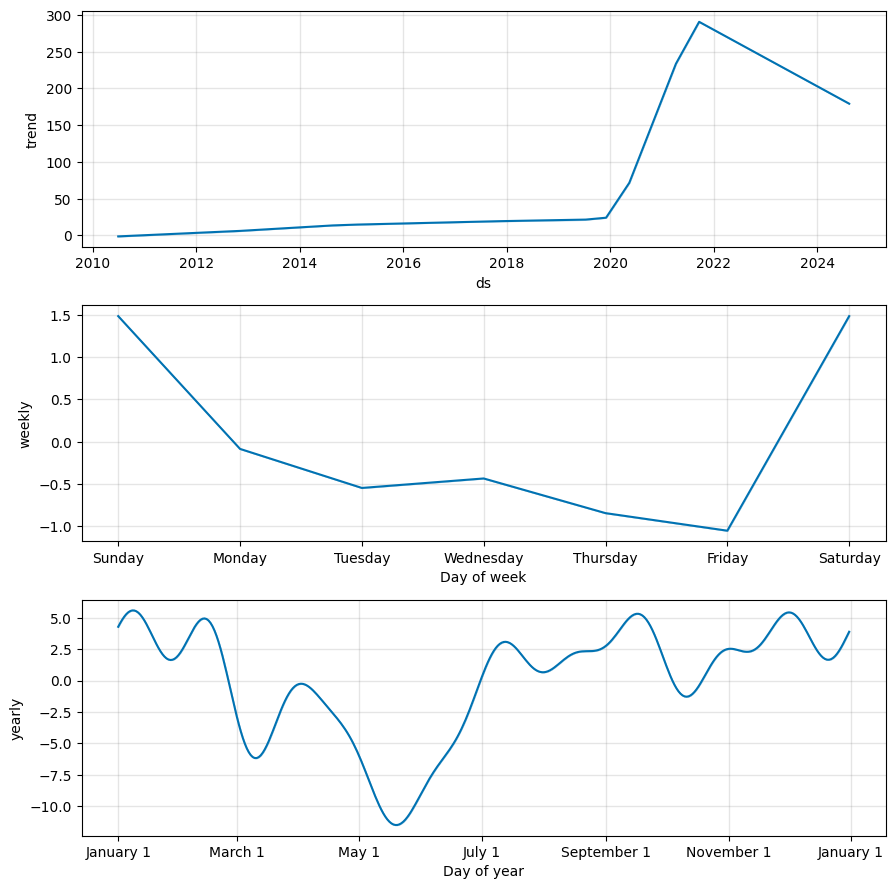

In [56]:
figure2=m.plot_components(forecast)

Download forecast data

In [57]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>